<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week16_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 16
# Review (Week 10 - 15)

- Test 2: Monday, May 24th, 1:30 - 3:30 pm.
- Account for 10% of final grades
- Open book test

## General Steps for A Machine Learning Project

- Data Explorative Analysis:
    - About the dataset: size, data types, missing values
    - About each feature: histogram / bar chart, min, max, mean, median, standard deviation, outliers
    - About the relationship between two features: scatter plot, correlation coefficient
    - Prepare for machine learing: fill missing values, encode categorical variables, normalize feature values, train-test split
- Building models
    - Select models properly
    - Train each model on the training set
    - Adjust the model "hyper-parameters" (such as polynomial degree, layer type and size of neural networks, tree depth of decision tree and random forests)
- Model selection
    - Performance measure: accuracy, mean-squared-error, precision, recall, F1 score, confusion matrix
    - Model visualization: decision boundary, loss curve
    - Error inspection
    - Improve modeling


## Week 10: Nonlinear SVM
- SVM with nonlinear kernels allows for nonlinear decision boundaries.
- Nonlinear kernels: polynomial kernel, Gaussian RBF kernel

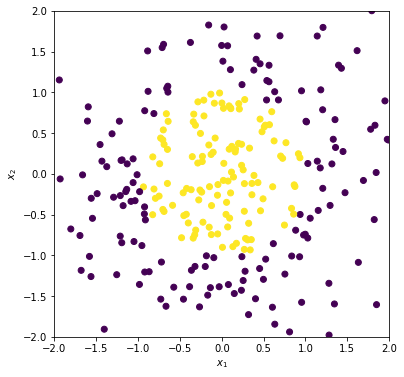

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Example: points on a 2D plane

m = 300  # size of data set
data = pd.DataFrame(index=np.arange(m))
# input features: x1, x2
data['x1'] = np.random.randn(m)
data['x2'] = np.random.randn(m)
# target value: y
# y = 0 if (x1, x2) is inside the unit circle
# y = 1 if (x1, x2) is outside of the unit circle
data['y'] = (data['x1'] ** 2 + data['x2'] ** 2 < 1).astype(int)

# plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data['x1'],
            data['x2'],
            c=data['y'])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [3]:
# Exercise: build a SVM classifier for the above dataset.



## Week 11: Decision Trees and Random Forests
- Build a decision tree classifier with Gini purity as measurement.
- Visualize a decision tree classifier.
- Find appropriate values for the hyper parameters of a decision tree classifier.
- Build a random forest classifier.

In [6]:
# Example: Titanic Data

titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
titanic['Sex'] = titanic['Sex'].apply(lambda x: int(x == 'male'))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


The features are:
- Survived: whether the passenger survived. This is the target feature.
- Pclass: the ticket class
- Sex: 0 means female, 1 means male.
- Age
- SibSp: number of siblings / spouses aboard the Titanic
- Parch: number of parents / children aboard the Titanic
- Fare

1. Split the data into training set (80%) and test set (20%)
2. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance.
3. Use `plot_tree` function from `sklearn` to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement `plt.figure(figsize=(12,12))` **before** the `plot_tree` statement to make the graph larger.
4. Build a random forest model with the same `max_depth` value and `n_estimators=100`. Show the accuracy score on the test set.

## Week 12-15: Neural Networks

- Generate the output of a neural network "by hand".
- Construct a neural network with:
    - Dense layers
    - Convolutional layers
    - Recurrent layers (not required for the test)
- Transformation layers:
    - Flatten
    - Max pooling
- Avoid overfitting:
    - Dropout

In [5]:
# Example: Fashion MNIST
import tensorflow as tf
print("Version: ", tf.__version__)

# Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Version:  2.4.1
4423680/4422102 [==============================] - 0s 0us/step


Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes without activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?